<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.4: Regularisation

In [1]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

### 1. Regularisation

The goal of "regularizing" regression models is to structurally prevent overfitting by imposing a penalty on the coefficients of the model.

Regularization methods like the Ridge and Lasso add this additional "penalty" on the size of coefficients to the loss function. When the loss function is minimized, this additional component is added to the residual sum of squares.

In other words, the minimization becomes a balance between the error between predictions and true values and the size of the coefficients. 

The two most common types of regularization are the **Lasso**, **Ridge**. 

#### 1.1 Load Diabetics Data Using datasets of sklearn

Hint: Check Lab 4.3

In [9]:
## Load the Diabetes dataset
diabetes = datasets.load_diabetes() #imports dictionary

diabetes.keys() #see keys of imported dictionary

# Load the diabetes dataset from sklearn

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [10]:
diabetes['feature_names'] #access elements of key: feature_names in array form
#will output as list the column names of df


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [11]:
# Description

In [12]:
# Predictors
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [13]:
# Target
y = diabetes.target 
#type(y) #y is already in array form

#### 1.2 Create a Base Model Using Linear Regression

In [14]:
# Create Model
lr = LinearRegression()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
# Fit
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
# Score
lr.score(X_test, y_test)
#tells you 44% of  y-hat can be explained by x

0.43845698491295737

In [18]:
# Check Coefficient
lr.coef_
#output is in order of columns (X input)

array([ -13.30476433, -238.04429689,  582.20780727,  345.72234704,
       -647.61205846,  340.89449144,   90.19356558,  217.6191519 ,
        664.57956633,   46.12251913])

In [27]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

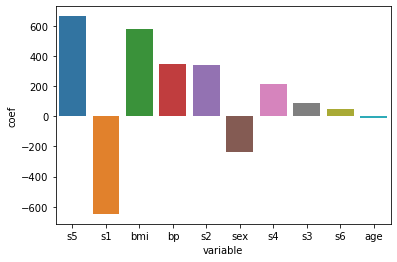

In [21]:
# Plot Coefficients
view_coeff(X, lr)

#### 1.3 Ridge

##### 1.3.1 Calculate Ridge Regression model

In [22]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)
    #start = -6
    #stop = 6
    #no. of samples to generate = 200, otherwise default 50
    #will generate 200 evenly spaced values between base10^-6 and base10^6, log scale

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a) #default alpha is 1.0
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, lr.coef_))
        #y_true = clf.coef_
        #y_pred = lr.coef_
        
#errors

##### 1.3.2 Visual Representation of Coefficient of Ridge Model

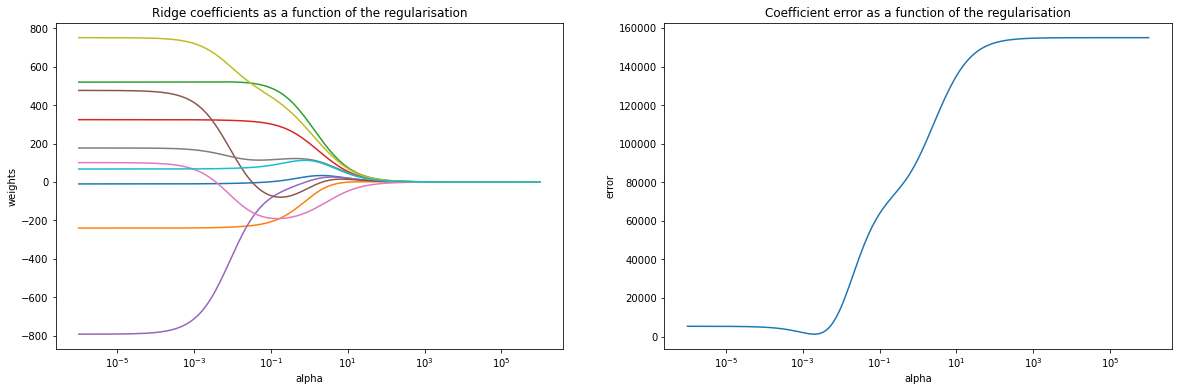

In [23]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
    #3-digit integer describing the position of subplot (nrows, ncols, index in order)
ax = plt.gca()
    #gca = get current axes
    #gives handle to the last active axes (if no axes yet, it creates axes)
    #if >1 subplot, the subplot created last is "current" one
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

##### 1.3.3. [BONUS]  Find an optimal value for Ridge regression alpha using `RidgeCV`.

[Go to the documentation and read how RidgeCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [26]:
#RidgeCV = ridge regression with built-in cross-validation
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
    #cv = determines cross-validation splitting strategy:
        #None = leave-one-out CV
        #int = no. of folds
        #etc.
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 0.06669919663030115
Score: 0.5138362231730855


In [ ]:
#optimal_ridge.fit(X_train, y_train)
#print('Alpha:', optimal_ridge.alpha_)
#print('Score:', optimal_ridge.score(X_test, y_test))

#will return:
    #alpha: 0.088 (higher)
    #score = 0.437 (lower)
    
#note: the linreg above wasn't subjected to 10-fold CV so less robust than this 0.437 score

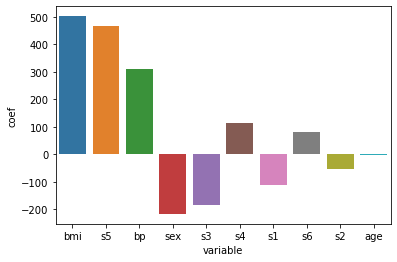

In [25]:
view_coeff(X, optimal_ridge)
#for new model, w optimal alpha (vs old linreg model)
#these are respective coefficients for various predictor variables

#### 1.4 Lasso

##### 1.4.1 Calculate Lasso Regression model

In [31]:
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters
las = Lasso()

# keep track of the intermediate results for coefficients and errors
coefs_las = []
errors_las = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in lasso_alphas:
    las.set_params(alpha = a)
    las.fit(X, y)
    coefs_las.append(las.coef_)
    errors_las.append(mean_squared_error(las.coef_, lr.coef_))

##### 1.4.2 Visual Representation of Coefficient of Lasso Model

Hint: Same as Ridge

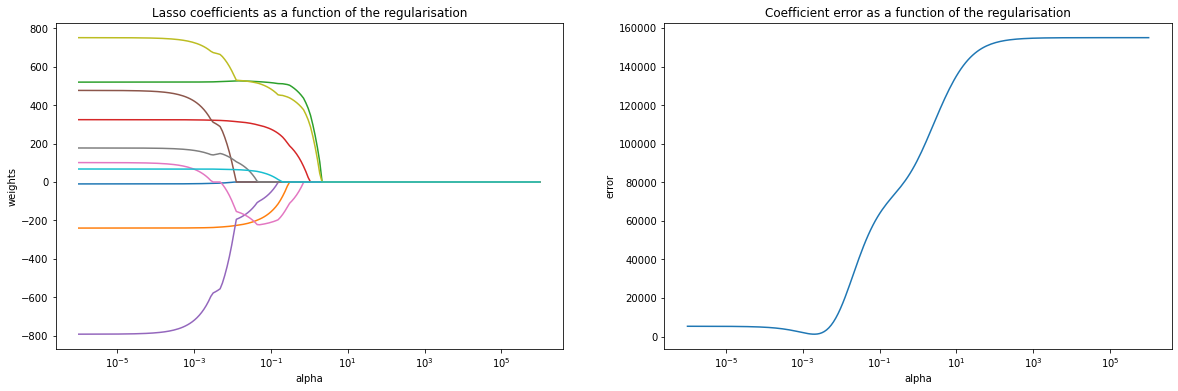

In [29]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
    #3-digit integer describing the position of subplot (nrows, ncols, index in order)
ax = plt.gca()
    #gca = get current axes
    #gives handle to the last active axes (if no axes yet, it creates axes)
    #if >1 subplot, the subplot created last is "current" one
ax.plot(lasso_alphas, coefs_las)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

##### 1.4.3. [BONUS]  Find an optimal value for Lasso regression alpha using `LassoCV`.

[Go to the documentation and read how LassoCV works.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization

In [32]:
# Find Optimal Lasso Using LassoCV
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)
    #cv = determines cross-validation splitting strategy:
        #None = leave-one-out CV
        #int = no. of folds
        #etc.
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

Alpha: 0.05805225516094896
Score: 0.512648775957248


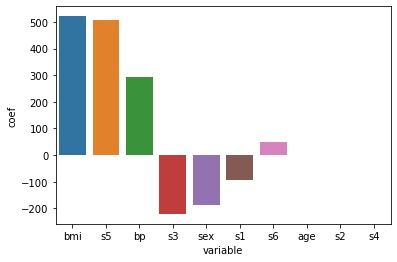

In [33]:
# Plot Coefficient
view_coeff(X, optimal_lasso)

### 2. [Bonus] Compare the residuals for the Ridge and Lasso visually.

Find and create sctterplot for both Ridge and Lasso residuals.

In [0]:
# Build the ridge and lasso using optimal alpha

# Need to fit the Lasso and Ridge outside of cross_val_score like we did with the ridge

In [0]:
# model residuals:

In [0]:
# Jointplot



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



